In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

### 데이터 준비

In [30]:
df = pd.read_csv('coin_Bitcoin.csv')
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [32]:
# SNo, Name, Symbol 컬럼 제거

df = df.drop(['SNo', 'Name', 'Symbol'], axis=1)
df

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...
2986,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [33]:
# date 컬럼을 시계열 데이터로 변환

df['Date'] = pd.to_datetime(df['Date'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2991 non-null   datetime64[ns]
 1   High       2991 non-null   float64       
 2   Low        2991 non-null   float64       
 3   Open       2991 non-null   float64       
 4   Close      2991 non-null   float64       
 5   Volume     2991 non-null   float64       
 6   Marketcap  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 163.7 KB


In [35]:
# 인덱스로 만들기
df = df.set_index('Date')
df

,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...
2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11


### 전체적인 추이

In [36]:
df_price = df[['Close']]
df_volume = df[['Volume']]

In [37]:
# resample (연도별, 월별, 일별)

df_py = df_price.resample('Y').mean()
df_pm = df_price.resample('M').mean()
df_pd = df_price.resample('D').mean()

df_vy = df_volume.resample('Y').mean()
df_vm = df_volume.resample('M').mean()
df_vd = df_volume.resample('D').mean()

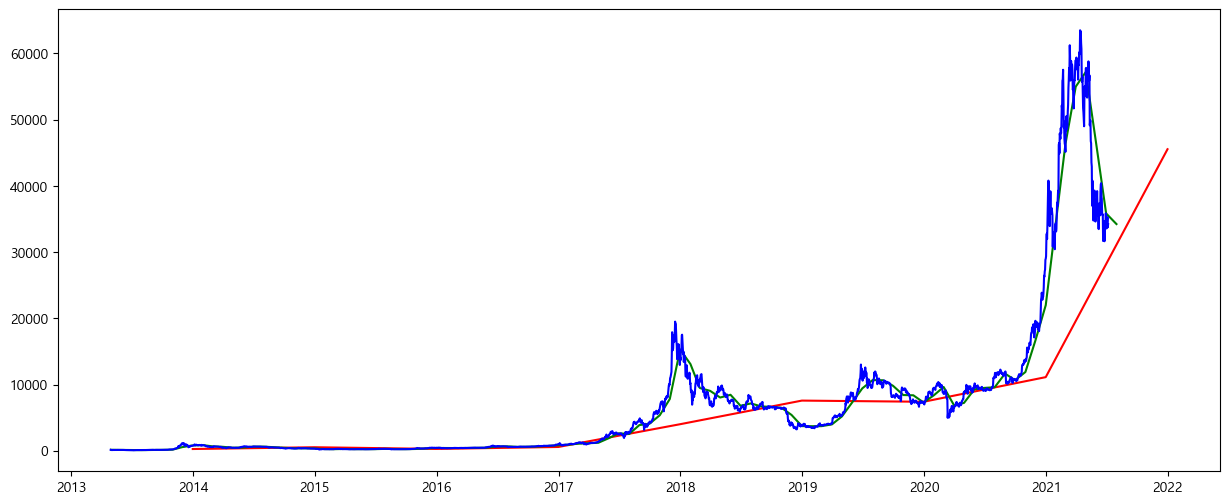

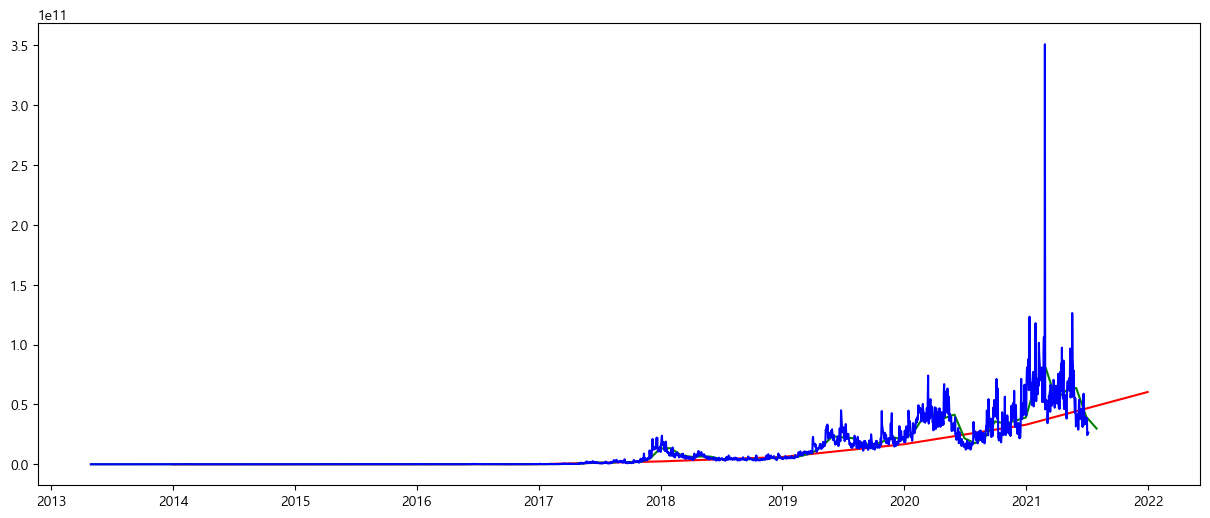

In [38]:
plt.figure(figsize=(15, 6))
plt.plot(df_py.index, df_py, color='r')
plt.plot(df_pm.index, df_pm, color='g')
plt.plot(df_pd.index, df_pd, color='b')

plt.figure(figsize=(15, 6))
plt.plot(df_vy.index, df_vy, color='r')
plt.plot(df_vm.index, df_vm, color='g')
plt.plot(df_vd.index, df_vd, color='b')

plt.show()

- 2013~2016 까지는 거래량 및 가격 변동이 미미함
- 2017년부터 둘 다 조금씩 오르더니, 이후로 급격히 성장

### 그럼 거래량과 가격 사이에 관계가 있을까?

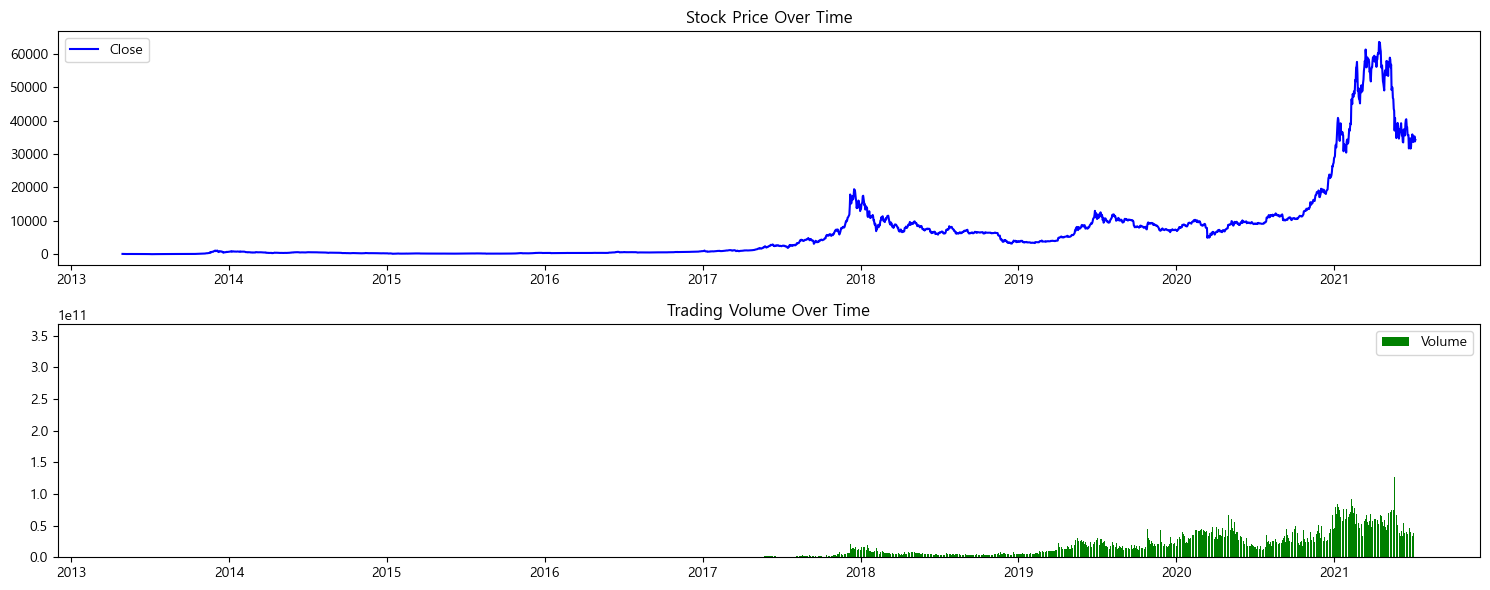

In [39]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close', color='b')
plt.title('Stock Price Over Time')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], label='Volume', color='g')
plt.title('Trading Volume Over Time')
plt.legend()

plt.tight_layout()
plt.show()

- 가격 그래프와 거래량 그래프의 추이가 서로 비슷하게 나타남

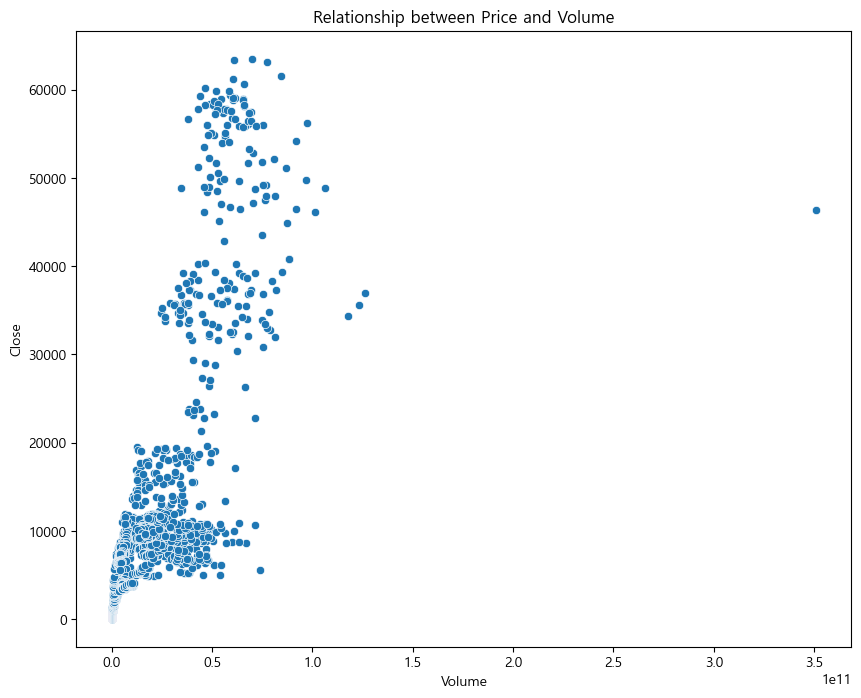

In [40]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Volume', y='Close', data=df)
plt.title('Relationship between Price and Volume')
plt.show()

- 산점도에서는 거래량과 가격이 양의 상관관계를 띄고 있음을 알 수 있음

### ADF 검정을 통한 정상성 확인

In [42]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
timeseries_data = df['Close']

adf_test(timeseries_data)

ADF Statistic: -0.7973098451195615
p-value: 0.819911003323915
Critical Values: {'1%': -3.4325603944919445, '5%': -2.8625166073924957, '10%': -2.567289874591689}


- p-value가 0.05 보다 크므로 귀무가설(시계열 데이터에 단위근이 존재) 채택
- 즉, 정상성을 만족하고 있지 않은 데이터임을 확인

In [65]:
df = pd.read_csv('coin_Bitcoin.csv')
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [66]:
# SNo, Name, Symbol, Date 컬럼 제거

df = df.drop(['SNo', 'Name', 'Symbol', 'Date'], axis=1)
df

,High,Low,Open,Close,Volume,Marketcap
0,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...
2986,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2991 non-null   float64
 1   Low        2991 non-null   float64
 2   Open       2991 non-null   float64
 3   Close      2991 non-null   float64
 4   Volume     2991 non-null   float64
 5   Marketcap  2991 non-null   float64
dtypes: float64(6)
memory usage: 140.3 KB


### 데이터셋 분리

In [149]:
X = df.drop('Close', axis=1)
y = df['Close']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    shuffle=False,
                                                    random_state=1234)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2392, 5) (2392,)
(599, 5) (599,)


### SVR

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [152]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_model

SVR()

In [153]:
# 스케일링 전
print('SVR train set score: {:.3f}'.format(svr_model.score(X_train, y_train)))
print('SVR test set score: {:.3f}'.format(svr_model.score(X_test, y_test)))

SVR train set score: -0.044
SVR test set score: -1.334


In [154]:
# 스케일링 진행
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model.fit(X_train_scaled, y_train)

print("Scaled test set accuracy: {:.3f}".format(svr_model.score(X_test_scaled, y_test)))

Scaled test set accuracy: -1.333


- test set이 아주아주아주 조금 나아짐...

In [155]:
# 커널 선택
svr_model = svm.SVR(kernel='linear', gamma='auto')

svr_model.fit(X_train_scaled, y_train)

print('SVR train set score: {:.3f}'.format(svr_model.score(X_train_scaled, y_train)))
print('SVR test set score: {:.3f}'.format(svr_model.score(X_test_scaled, y_test)))

SVR train set score: -0.182
SVR test set score: -1.086


- 커널 선택을 해주었더니 test set이 더 나아짐, 근데 train set이 더 안좋아짐

In [156]:
y_pred = svr_model.predict(X_test)

C:\Users\01che\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [157]:
# 매개변수 튜닝

svr_model = svm.SVR(kernel='linear', gamma='auto', C=10)

svr_model.fit(X_train_scaled, y_train) 
print('SVR train set score: {:.3f}'.format(svr_model.score(X_train_scaled, y_train)))
print('SVR test set score: {:.3f}'.format(svr_model.score(X_test_scaled, y_test)))

SVR train set score: 0.896
SVR test set score: 0.836


In [159]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("평균 제곱 오차 (MSE):", mse)
print("R-squared:", r2)

평균 제곱 오차 (MSE): 3.2443346586384772e+28
R-squared: -1.066373195732679e+20


### 필요없는 코드

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=7)
forest.fit(X_train, y_train)

print('Random Forest train set score: {:.3f}'.format(forest.score(X_train, y_train)))
print('Random Forest test set score: {:.3f}'.format(forest.score(X_test, y_test)))

#### Grid Search를 위한 하이퍼파라미터 조합 찾기
param_grid = {'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1]
              'max_depth': [2, 3, ,4, 5, 6],
              'n_estimators': [100, 200, 300]}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#### 매개변수로 사용할 분류모형, parameter 집합과 cross-validation의 k 등을 지정
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(
    , iris.target, random_state=0)

#### 객체 생성
xgb_model = XGBRegressor(objective='reg:squarederror')

#### Time Series Cross-Validation을 사용하여 Grid Search 수행
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

tscv = TimeSeriesSplit(n_splits=5)  # 시계열 데이터에 적합한 교차 검증
grid_search = GridSearchCV(estimator = xgb_model,
                           param_grid = param_grid,
                           cv = tscv,
                           scoring = 'neg_mean_squared_error',
                           verbose = 1)
grid_search.fit(X_train, y_train)

#### 최적 모델 획득
best_model = grid_search.best_estimator_
print(best_model)

#### 테스트 데이터를 사용하여 예측
y_pred = best_model.predict(X_test)

plt.figure(figsize=(20, 8))
plt.plot(df.index[-len(y_test):], y_test, label='real data')
plt.plot(df.index[-len(y_test):], y_pred, label='XGBoost predict')
plt.legend()
plt.show()

#### 모델 성능 평가 (평균 제곱 오차 사용)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')